## IMPORT LIBRARY 

In [6]:
#importation of necessary libraries
import pandas as pd
import matplotlib #juste pour puvoir afficcher la version ,si non pas vraiment necessaire pour l'utilisation de plt
import matplotlib.pyplot as plt
import seaborn as sns


#visualisaation des versions
# Supposons que 'listes' soit une liste de bibliothèques
listes = [pd, matplotlib, sns]

# Boucle pour afficher les versions
for i in range(len(listes)):
    print( '{} version : {}'.format(listes[i].__name__, listes[i].__version__) )


pandas version : 2.2.3
matplotlib version : 3.10.1
seaborn version : 0.13.2


In [7]:
# fonction
import sys
sys.path.append(r"C:\Users\franc\Desktop\DATA_SCIENCE\ML_PRO\DOC")
from perso import *

## DATA

In [8]:
df.info()
df.nunique()

NameError: name 'df' is not defined

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
#importation of the datat as df
df = sns.load_dataset("tips")
df.head(-5 )
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

## ANALYSE UNIVARIEE

In [ ]:
#show the columns of the dataframe
df.columns

#show the type of each column
df.dtypes


total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

### VARIABLE DISCTRETE

In [ ]:

listes_vd=liste_vd(data=df)
for vd in listes_vd:
    count = df[vd].value_counts(normalize=False,sort=False, ascending= False)
    print(count," \n")
    


sex
Male      157
Female     87
Name: count, dtype: int64  

smoker
Yes     93
No     151
Name: count, dtype: int64  

day
Thur    62
Fri     19
Sat     87
Sun     76
Name: count, dtype: int64  

time
Lunch      68
Dinner    176
Name: count, dtype: int64  



In [10]:
listes_vd=liste_vd(data=df)

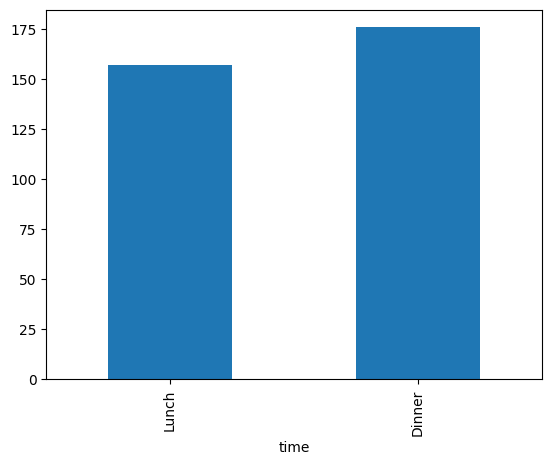

In [11]:
## AVEC PANDAS
for vd in listes_vd:
    count = df[vd].value_counts(normalize=False,sort=False, ascending= False)
    count.plot(kind="bar")

<function matplotlib.pyplot.show(close=None, block=None)>

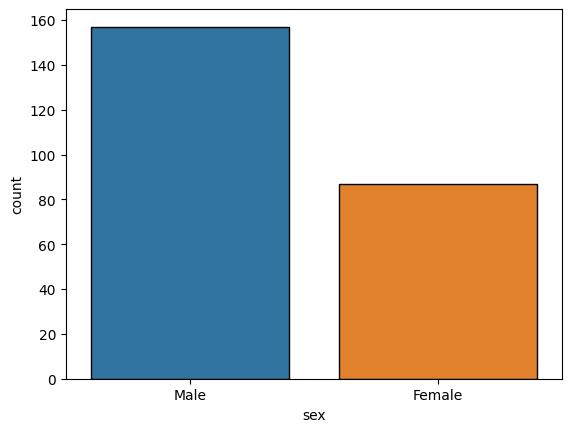

In [ ]:
## AVEC SEABORN you use the function countplot 
#you put the data frame in the parameter data , x is the variable you want to plot and palette is the color of the plot 
# also you can put edgecolor to have a black border
sns.countplot(data= df , x="sex" ,hue="sex" ,edgecolor='black' )

# show the plot
plt.show


### VARIABLE CONTINUE

              tip  total_bill
count  244.000000  244.000000
mean     2.998279   19.785943
std      1.383638    8.902412
min      1.000000    3.070000
25%      2.000000   13.347500
50%      2.900000   17.795000
75%      3.562500   24.127500
max     10.000000   50.810000


<Axes: ylabel='Frequency'>

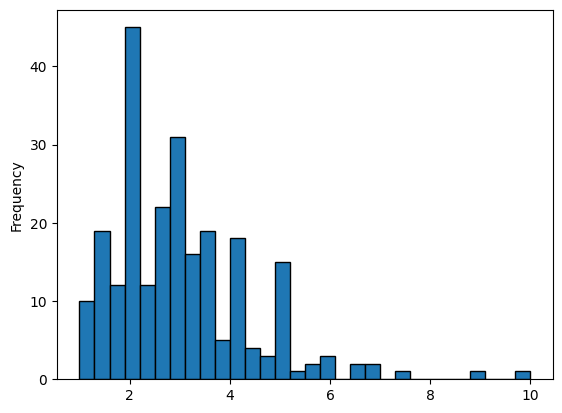

In [15]:
#direct visualisation of each metric of the variable by describe
liste_vc=['tip','total_bill']

vc= df[liste_vc].describe()
print(vc)
#histogram of the variable tip
df['tip'].plot(kind='hist',bins=30,edgecolor="black")



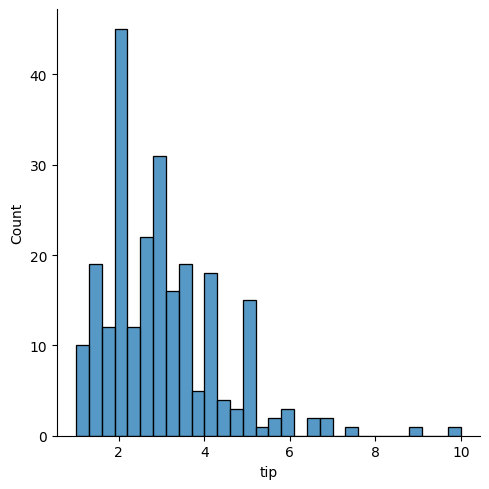

In [ ]:
#with sns
sns.displot(data=df, x='tip',bins=30,edgecolor="black")


## boxplot


<Axes: >

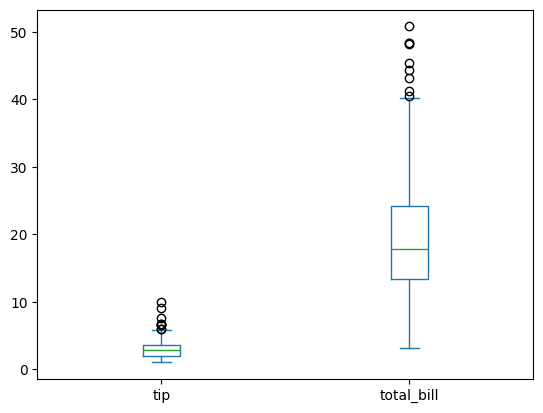

In [ ]:
#with pandas
df[liste_vc].plot(kind='box')

<Axes: xlabel='tip'>

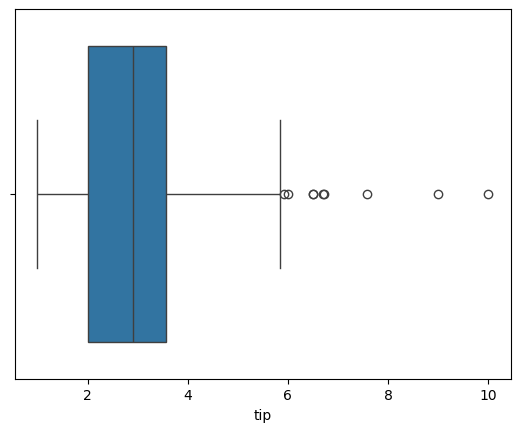

In [18]:
#with sns
sns.boxplot(data=df, x='tip')

## ANALYSE MULTIVARIE (BIVARIEE)

### discret/discret

In [19]:
pd.crosstab(df['smoker'],df['sex'],normalize=False)


sex,Male,Female
smoker,,
Yes,60,33
No,97,54


<Axes: xlabel='day', ylabel='size'>

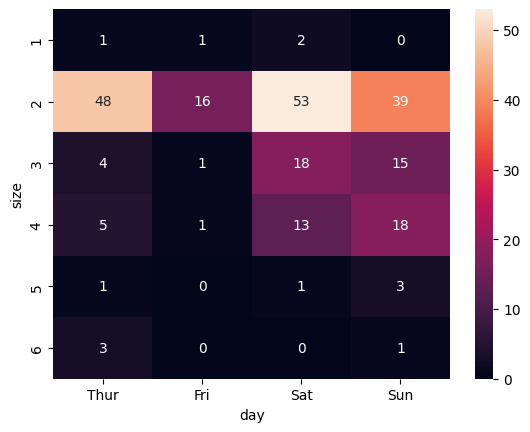

In [23]:
#when your discret value can take much value like days and number of people in one table , it's more interresting to use 
#the heatmap

sns.heatmap(pd.crosstab(df['size'],df['day'],normalize=False),annot=True)



## discret/continue

In [26]:
df.groupby('sex')["tip"].describe().head()

C:\Users\franc\AppData\Local\Temp\ipykernel_132\947147224.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')["tip"].describe().head()


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Male,157.0,3.089618,1.489102,1.0,2.0,3.00,3.76,10.0
Female,87.0,2.833448,1.159495,1.0,2.0,2.75,3.50,6.5


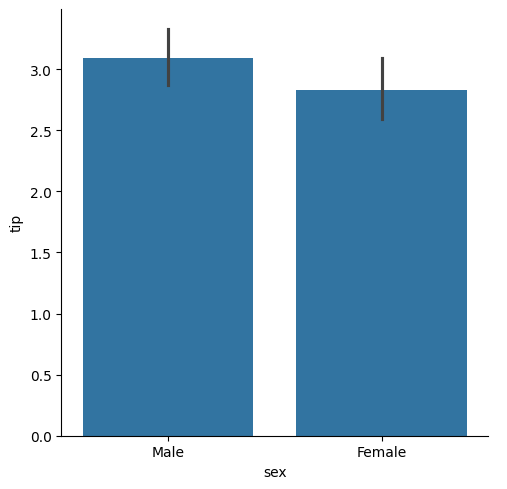

In [ ]:
#with seaborn (sns)
sns.catplot(data=df, x='sex',y='tip',kind='bar')


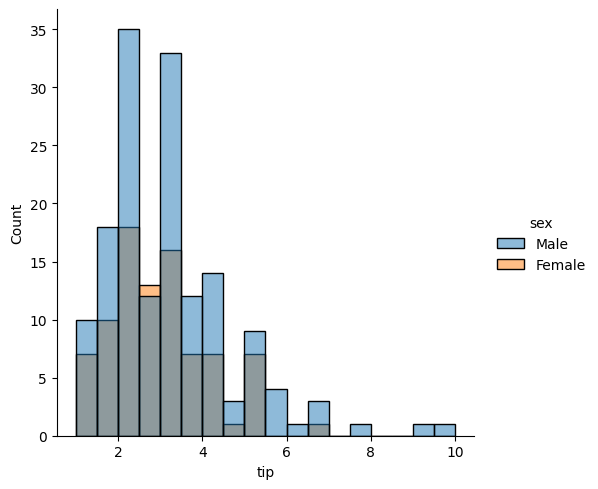

In [ ]:
sns.displot(data=df,x="tip",hue='sex')

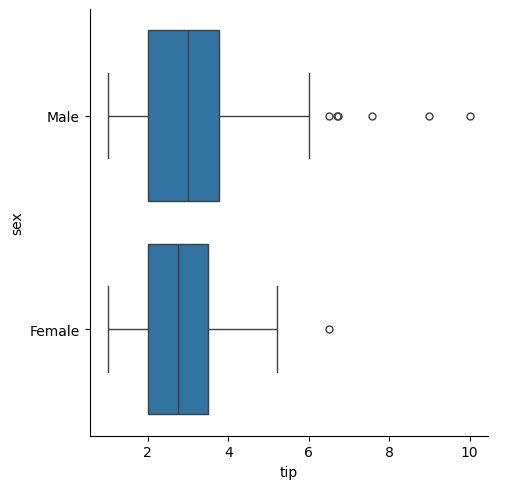

In [30]:
# The previous code raised a ValueError because 'box' is not a valid value for the 'kind' parameter in sns.displot.
# Here is the corrected code:
sns.catplot(data=df, x="tip", y='sex', kind="box" )

## continue/continue

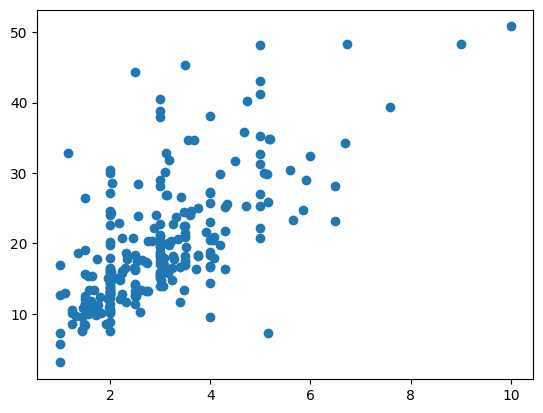

In [35]:
plt.scatter(df["tip"],df["total_bill"],)
plt.show()

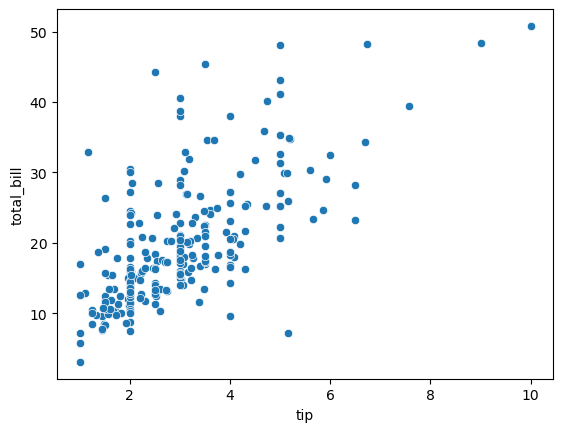

In [ ]:
sns.scatterplot(data=df,x='tip',y="total_bill")
plt.show()
